# Reddit submissions and comments
This notebook shows how to read the Reddit dataset and how to compare the content of the files with the Reddit webpages. We will learn how to select the relevant information from the database and make some simple analyses.

## How to read and handle a json file
We first need to open the json file containing all the reddit submissions related to a certain stock; here we focus on FIZZ. We start by getting the data from the repository.

In [1]:
from sociophysicsDataHandler import SociophysicsDataHandler

student_config = True

file_target = 'asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet' 

if student_config:
    dh = SociophysicsDataHandler()
    dh.fetch_prorail_data_from_path(file_target)
else:
    webdav_basepath='/Crowdflow (Projectfolder)/ProRail_USE_LL_data'
    dh = SociophysicsDataHandler(basepath=webdav_basepath)
    
    dh.fetch_prorail_data_from_path(file_target)
                           # ,basepath=webdav_basepath)

print('The available files are the following:')
dh.list_files("econophysics/reddit/")

trying to fetch: /ProRail_USE_LL_data/asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet
data fetched. Accessible as <this-object>.df
The available files are the following:
targeting path /ProRail_USE_LL_data\econophysics/reddit/
Files listed. Accessible as <this-object>.filelist


,path,name,attributes
0,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_AAPL.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
1,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_AMC.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
2,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_BBBY.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
3,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_FIZZ.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
4,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_GME.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
5,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_LGND.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
6,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_NOKIA.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
7,/ProRail_USE_LL_data\econophysics/reddit/comme...,comments_VIAC.tar.gz,"{'{DAV:}getlastmodified': 'Sat, 11 Sep 2021 13..."
8,/ProRail_USE_LL_data\econophysics/reddit/submi...,submissions_wallstreetbets_AAPL_start20200901_...,"{'{DAV:}getlastmodified': 'Tue, 06 Jul 2021 11..."
9,/ProRail_USE_LL_data\econophysics/reddit/submi...,submissions_wallstreetbets_AMC_start20200901_e...,"{'{DAV:}getlastmodified': 'Tue, 06 Jul 2021 14..."


In [2]:
import pandas as pd
stock = 'FIZZ'
filename = 'submissions_wallstreetbets_' + stock + '_start20200901_end20210706.json' # insert here your path 
dh.fetch_econophysics_data_from_path("econophysics/reddit/" + filename)
df = dh.df
# print one of the entries (in this case, the fifth):
print(df.iloc[170])

trying to fetch: /ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_FIZZ_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
all_awardings                                                           []
author                                                          firstorbit
author_fullname                                                   t2_y2f5c
created                                                         1624415644
created_utc                                                     1624422844
full_link                https://www.reddit.com/r/wallstreetbets/commen...
gildings                                                                {}
id                                                                  o65l9k
link_flair_css_class                                                    dd
link_flair_text                                                         DD
num_comments                                                            40
num_cross

## Comparison with the corresponding Reddit webpage
Let's consider for example the submission identified by the code 'o65l9k'. We can understand what the field contained in the json files mean by looking at the corresponding Reddit webpage.

In [13]:
subm = 'o65l9k'
df.loc[subm]
print('')
print('The web link of submission', subm, 'is: ', df['full_link'].loc[subm])


The web link of submission o65l9k is:  https://www.reddit.com/r/wallstreetbets/comments/o65l9k/fizz_is_about_ready_to_pop/


In [24]:
# the comments associated to the submission are in a separate json file:
dh.fetch_econophysics_data_from_path("econophysics/reddit/comments_" + stock + ".tar.gz")
dh.reddit_comments.get_comment_matching_id(subm)
df_comments = dh.reddit_comments.df[0]
df_comments.head()

#dh.reddit_comments.get_file_names() # to get the list files in the tar archive

trying to fetch: /ProRail_USE_LL_data\econophysics/reddit/comments_FIZZ.tar.gz
data fetched. Accessible as <this-object>.reddit_comments
comments_FIZZ/comments_FIZZ_idsubmission_o65l9k.json
data fetched. Accessible as <this-object>.reddit_comments.df


,all_awardings,associated_award,author,author_fullname,awarders,body,comment_type,gildings,id,link_id,...,permalink,retrieved_on,score,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,created_utc,created_utc_time
0,[],NaN,firstorbit,t2_y2f5c,[],Fuck yeah. That's the spirit!,NaN,{},h2x9a7f,t3_o65l9k,...,/r/wallstreetbets/comments/o65l9k/fizz_is_abou...,1624857581,1,wallstreetbets,t5_2th52,NaN,0,[],1624565157,2021-06-24 20:05:57
1,[],NaN,nws158,t2_2ac9j9fo,[],I just went in today. $500k deep. $FIZZ 🚀,NaN,{},h2x2230,t3_o65l9k,...,/r/wallstreetbets/comments/o65l9k/fizz_is_abou...,1624853761,2,wallstreetbets,t5_2th52,NaN,0,[],1624561882,2021-06-24 19:11:22
2,[],NaN,EldForever,t2_59i4p0yc,[],Hm. What do you find unhealthy about water wit...,NaN,{},h2uul5z,t3_o65l9k,...,/r/wallstreetbets/comments/o65l9k/fizz_is_abou...,1624809274,1,wallstreetbets,t5_2th52,NaN,0,[],1624513940,2021-06-24 05:52:20
3,[],NaN,Major_Fang,t2_103n99,[],"Man I fucking hate drinking these things, I’m ...",NaN,{},h2thgoc,t3_o65l9k,...,/r/wallstreetbets/comments/o65l9k/fizz_is_abou...,1624782595,1,wallstreetbets,t5_2th52,NaN,0,[],1624486102,2021-06-23 22:08:22
4,[],NaN,dustycase2,t2_afxeg84b,[],“Former” juggalos?,NaN,{},h2suwmu,t3_o65l9k,...,/r/wallstreetbets/comments/o65l9k/fizz_is_abou...,1624771044,2,wallstreetbets,t5_2th52,NaN,0,[],1624475939,2021-06-23 19:18:59


In [25]:
num_comments = len(df_comments)
print('Number of comments:', num_comments)
print('For example, a comment is:')
df_comments.loc[1]

Number of comments: 40
For example, a comment is:


all_awardings                                                           []
associated_award                                                       NaN
author                                                              nws158
author_fullname                                                t2_2ac9j9fo
awarders                                                                []
body                             I just went in today. $500k deep. $FIZZ 🚀
comment_type                                                           NaN
gildings                                                                {}
id                                                                 h2x2230
link_id                                                          t3_o65l9k
locked                                                               False
no_follow                                                             True
parent_id                                                        t3_o65l9k
permalink                

In [26]:
df_comments.loc[0]

all_awardings                                                           []
associated_award                                                       NaN
author                                                          firstorbit
author_fullname                                                   t2_y2f5c
awarders                                                                []
body                                         Fuck yeah. That's the spirit!
comment_type                                                           NaN
gildings                                                                {}
id                                                                 h2x9a7f
link_id                                                          t3_o65l9k
locked                                                               False
no_follow                                                             True
parent_id                                                       t1_h2x2230
permalink                

In [27]:
# we can check the hierarchy of comments and replies by looking at the 'parent_id' field:
df_comments[['id','parent_id','body']]

,id,parent_id,body
0,h2x9a7f,t1_h2x2230,Fuck yeah. That's the spirit!
1,h2x2230,t3_o65l9k,I just went in today. $500k deep. $FIZZ 🚀
2,h2uul5z,t1_h2qndoh,Hm. What do you find unhealthy about water wit...
3,h2thgoc,t3_o65l9k,"Man I fucking hate drinking these things, I’m ..."
4,h2suwmu,t3_o65l9k,“Former” juggalos?
5,h2s9gfv,t3_o65l9k,[removed]
6,h2s1w7l,t1_h2qk3b3,"That's just what the ""consensus"" of analysts t..."
7,h2s1ecz,t1_h2qzpy7,FIZZ is a dark horse in the drinks industry. P...
8,h2rf1uw,t1_h2rdpjd,"If he hasn't sold any shares up to this point,..."
9,h2reh2z,t1_h2rak1w,"I grabbed that from the DD in Jan, but this se..."


## Select the relevant information
Not all the fields are equally useful for our analysis; here we select only some of them (this list is not exhaustive) in the case of the submissions file. A similar subsection can be made for the comments files.

In [28]:
list_fields = ['author_fullname','created_utc','num_comments','permalink','score','title','upvote_ratio']
df = df[list_fields]
print('The shape of the dataframe is now ', df.shape)
print(df.head())

The shape of the dataframe is now  (176, 7)
       author_fullname  created_utc  num_comments  \
ikmso9       t2_11bqj6   1598975514             2   
ikmyh8       t2_11bqj6   1598976041            11   
ind4n6     t2_5xkqyi99   1599355096            10   
iycabf     t2_32qhmlkl   1600874891             8   
k0o1ax        t2_7suwa   1606291490             0   

                                                permalink  score  \
ikmso9  /r/wallstreetbets/comments/ikmso9/lacroix_make...      1   
ikmyh8  /r/wallstreetbets/comments/ikmyh8/lacroix_make...      1   
ind4n6  /r/wallstreetbets/comments/ind4n6/nio_baas_is_...      1   
iycabf  /r/wallstreetbets/comments/iycabf/pop_pop_fizz...      1   
k0o1ax  /r/wallstreetbets/comments/k0o1ax/fizz_a_good_...      1   

                                                    title  upvote_ratio  
ikmso9  LaCroix Maker (FIZZ) in Multi-Year Cup-and-Han...           1.0  
ikmyh8  LaCroix Maker (FIZZ) breaking out of 20-month ...           1.0  
ind4n6

## Convert the times into readable format
One of the crucial features of the Reddit database is the time at which the submissions and comments have been made. In the json files, times are saved as integer values. Here we transform these values into DateTime values; the times are reported in GMT values (Greenwich Mean Time).

In [30]:
df['created_utc'] = pd.to_datetime(df['created_utc'], origin='unix', unit='s') 
# created_utc is the time when the submission was created by its author
print(df[['author_fullname','created_utc']].head())

       author_fullname         created_utc
ikmso9       t2_11bqj6 2020-09-01 15:51:54
ikmyh8       t2_11bqj6 2020-09-01 16:00:41
ind4n6     t2_5xkqyi99 2020-09-06 01:18:16
iycabf     t2_32qhmlkl 2020-09-23 15:28:11
k0o1ax        t2_7suwa 2020-11-25 08:04:50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Make a simple analysis (1)
Here we begin the analysis of the submissions, checking the distribution of the number of comments associated to each post.

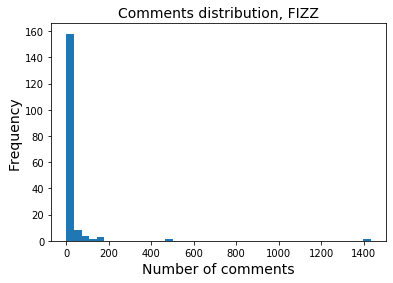

The maximum number of comments associated to a submission is 1434
The most commented post about FIZZ is identified by l9sh9e
Its title is " DDDD - Why GME Might 🚀🌝 Next Week, and How It Could Trigger a Financial Crisis "


In [32]:
import matplotlib.pyplot as pl
num_bins = 40 # number of bins for the histogram
pl.hist(df['num_comments'].values, bins=num_bins)
pl.xlabel('Number of comments', fontsize=14)
pl.ylabel('Frequency', fontsize=14)
pl.title('Comments distribution, FIZZ', fontsize=14)
pl.show()

print('The maximum number of comments associated to a submission is', df['num_comments'].max())
id_max = df[df['num_comments'] == df['num_comments'].max()].index[0]
print('The most commented post about FIZZ is identified by', id_max)
print('Its title is "', df['title'].loc[id_max], '"')

## Make a simple analysis (2)
We can also sort our dataframe based on some field. For example, here we rank the submissions based on their score and check what the correlation is between number of comments of submission score.

In [33]:
# sort in descending order, from the highest score to the lowest
df_sorted = df.sort_values(['score'], ascending=False) 
print(df_sorted.head())

# compute correlation between two columns of the dataframe:
correlation = df['score'].corr(df['num_comments'])
print('The correlation between score and number of comments is', correlation)

       author_fullname         created_utc  num_comments  \
l9sh9e        t2_t96r7 2021-02-01 02:25:47          1434   
l9suez     t2_3obja9fq 2021-02-01 02:45:25           175   
l8od5u     t2_4dq93axc 2021-01-30 15:49:27           130   
nxmp97     t2_cjkregvr 2021-06-11 18:24:14             4   
l0qvfq       t2_13bnbn 2021-01-19 19:14:34            43   

                                                permalink  score  \
l9sh9e  /r/wallstreetbets/comments/l9sh9e/dddd_why_gme...   4722   
l9suez  /r/wallstreetbets/comments/l9suez/now_imagine_...    332   
l8od5u  /r/wallstreetbets/comments/l8od5u/why_the_whal...     58   
nxmp97  /r/wallstreetbets/comments/nxmp97/i_visited_an...     14   
l0qvfq  /r/wallstreetbets/comments/l0qvfq/fyi_fizz_may...      8   

                                                    title  upvote_ratio  
l9sh9e  DDDD - Why GME Might 🚀🌝 Next Week, and How It ...          0.96  
l9suez  Now imagine Hedge Fund A &amp; B betting on th...          0.94  
l8od5u  